## Importing the Halo Pipeline
The first line of code is an import statement, it brings in the `HalosSkyPyPipeline` class from the `sim_pipeline.Pipelines.halos_pipeline` module.

For this jupyter notebook, the pipeline is generated from the YAML file, halo.yml. The default setting can be checked in readme.md in the data/Skypy folder.

In [16]:
from sim_pipeline.Pipelines.halos_pipeline import HalosSkyPyPipeline

pipeline = HalosSkyPyPipeline()

print(pipeline)

After initializing the pipeline, we can access the `halos` property of the `HalosSkyPyPipeline` instance. The specific output include properties of the halos in certain sky area (here is $ 0.0001\ deg^2$ or $1296\ acrsec^2$) 's light cone such as their redshift, masses.

In [17]:
halos= pipeline.halos
print(halos)

        z                 mass       
------------------ ------------------
 3.064972278891455 2419477705767.5737
 1.830255572767515  881062651725.2559
 4.886927373493783 413146148428.36554
 4.390733253409171   74093502970.7043
 2.133394371583783 113302612018.78908
 3.184262229188769  67062263837.45553
 4.325739503510456 60690586804.296524
3.0832834933884388  83399923171.59445
2.1447397712596383 58563009450.063034
1.8817942431966517  54441498713.76754
               ...                ...
 3.530701188284644  53993000725.87478
 2.671847771248314  582885160963.1642
 3.459859284572768  54414200842.59634
1.5980542778085092 54760502712.153145
1.6062759542132217  337797222161.5773
 4.022878660401138  76000976519.69533
 4.989890321691773   87431366995.2172
1.3849883876379063  86020376636.13132
2.2061136720992836  86901317751.47952
 4.423762176259411  66110696869.71684
0.8583885626147157  601443836478.4568
Length = 322 rows


## Calculating the convergence and shear
The `HalosLens` class from the `sim_pipeline.halos.halos_lens` module is used to calculate the gravitational lensing effects from the simulated halos. The `HalosLens` class is initialized with the previously generated halos, the sky area, the cosmological parameters, and the number of samples. We then call the `get_convergence_shear` method to calculate the convergence (\( \kappa \)) and shear (\( \gamma_1 \), \( \gamma_2 \)) or shear(\(\gamma_tot\)) at the origin due to all the halos.

In [18]:
# Import HalosLens class from the sim_pipeline.halos module
from sim_pipeline.halos.halos_lens import HalosLens
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Instantiate the HalosLens class with the halo list computed above and a defined sky area
halos_lens = HalosLens(halos_list=halos, sky_area=0.0001,cosmo=cosmo, samples_number= 1000)
# Get the convergence and shear values by calling the get_convergence_shear method
kappa,_,gamma1,gamma2 = halos_lens.get_convergence_shear()
print('kappa at center is: ',kappa)
print('gamma1 at center is: ',gamma1)
print('gamma2 at center is: ',gamma2)

kappa at center is:  1.1981068660845273
gamma1 at center is:  0.009525127141416068
gamma2 at center is:  -0.009241382864669578


### We can also get the lists of kappa and gamma values over the certain sky area by calling the `get_kappa_gamma_distib` method. To set `gamma_tot=True`, we can get the lists of `[kappa,gamma_tot]` with a length of `samples_number`

In [19]:
kappa_gamma_distribution = halos_lens.get_kappa_gamma_distib(gamma_tot=True)
print(kappa_gamma_distribution)

[[1.0952783487397202, 0.10096989812281312], [1.048957175329043, 0.07195047816434302], [1.1937818964088784, 0.012349609459049792], [1.2113984207126078, 0.04461377027709807], [1.3654919890978994, 0.05309603076524389], [1.1679742228188865, 0.05966878805907199], [1.040609688213118, 0.07110541490336984], [1.1806848825661462, 0.05543059020250244], [1.1408826741466567, 0.060726159245183], [1.1890825730734886, 0.0557271255007164], [1.105814761455467, 0.0602843328569404], [1.1581391731026196, 0.02888336120314781], [1.146444929834136, 0.07996477402246784], [1.1954069470189888, 0.027022722484534804], [1.1104617933894259, 0.03517469024259233], [1.0677268757897846, 0.004229736956700373], [1.1060122536125188, 0.02855747561871997], [1.2637983537602242, 0.05249235454067277], [1.1031631357576817, 0.0717523779362874], [1.1194299925711149, 0.016902255825277757], [1.0199888440423954, 0.05121508709790796], [1.2029233430632713, 0.085340379640211], [1.1686055183911273, 0.052795236902894345], [1.2005067032242

### We visualize the distributions of the modified kappa and gamma values using histograms.
The variable `modified_kappa_halos` is calculated by subtracting the mean of the kappa values (`mean_kappa`) from each individual kappa value in `kappa_values_halos`. modified_kappa_halos = kappa_values_halos - mean_kappa

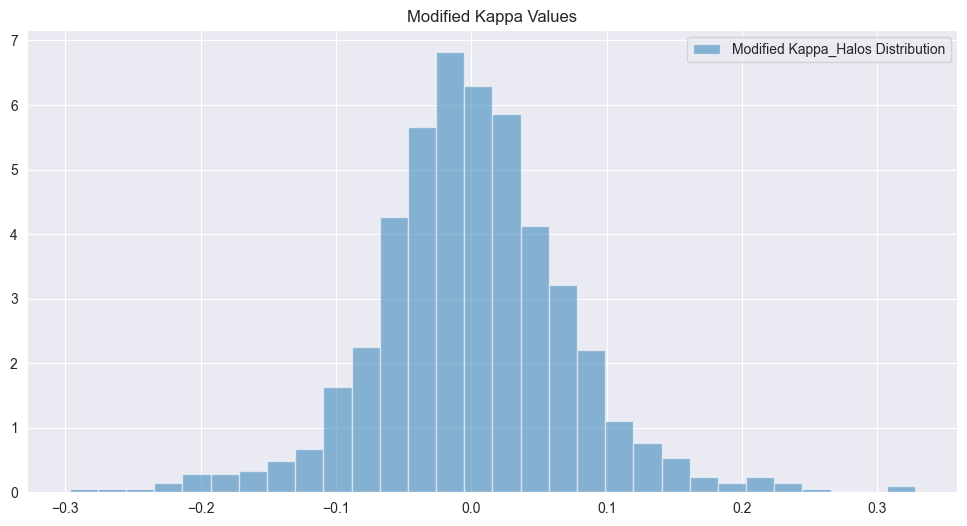

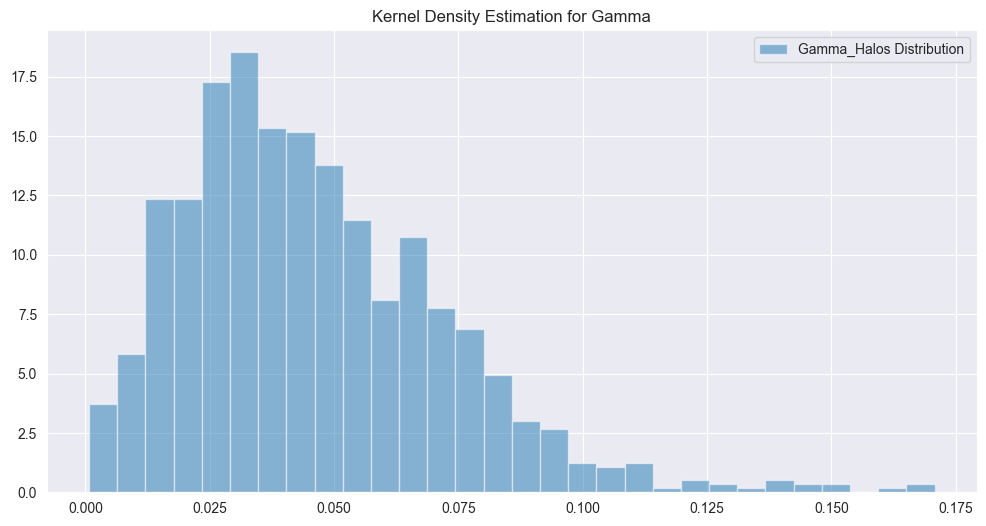

In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
kappa_gamma_distribution = np.array(kappa_gamma_distribution)  # Convert list of lists to numpy array
kappa_values_halos = kappa_gamma_distribution[:, 0]  # Get the first column of each row
gamma_values_halos = kappa_gamma_distribution[:, 1]  # Get the first column of each row

mean_kappa = np.mean(kappa_values_halos)

modified_kappa_halos = kappa_values_halos - mean_kappa

x_grid = np.linspace(min(modified_kappa_halos), max(modified_kappa_halos), 10000)

plt.figure(figsize=(12, 6))
plt.hist(modified_kappa_halos, bins=30, density=True, alpha=0.5, label='Modified Kappa_Halos Distribution')
plt.title('Modified Kappa Values')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.hist(gamma_values_halos, bins=30, density=True, alpha=0.5, label='Gamma_Halos Distribution')
plt.title(f'Kernel Density Estimation for Gamma')
plt.legend()
plt.show()


Finally, we use a Gaussian Kernel Density Estimation (KDE) to generate a random sample of kappa and gamma values based on the existing distributions. The joint distribution of these random kappa and gamma values is plotted using seaborn's `jointplot` function.

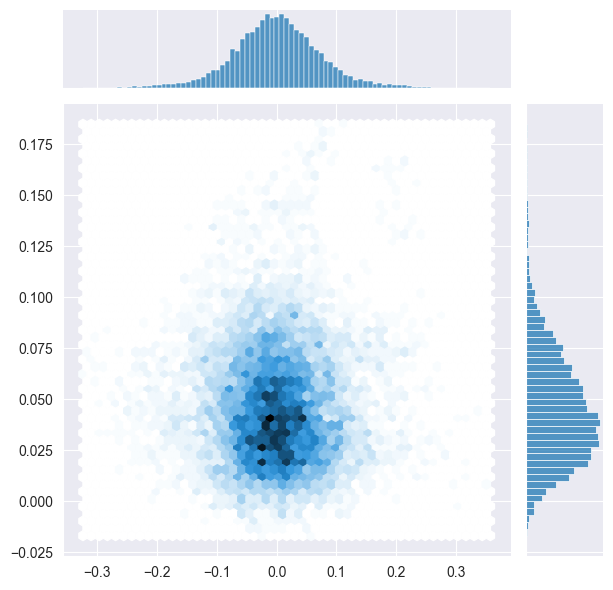

In [21]:
import seaborn as sns
kernel = stats.gaussian_kde(np.vstack([modified_kappa_halos, gamma_values_halos]))
n = 10000  # Number of random numbers to generate
kappa_random_halos, gamma_random_halos = kernel.resample(n)
sns.jointplot(x=kappa_random_halos, y=gamma_random_halos, kind='hex')
plt.show()